<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/1.TF-Intro/TF_Intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import tensorflow as tf
import numpy as np

##Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [13]:
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

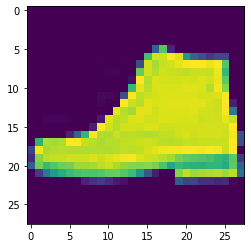

In [14]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[0])
print(training_images[0])

In [15]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

##Model

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5058
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3804
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3424
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3171
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2985


In [18]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3432


0.3431924283504486

##Testing different configurations

In [19]:
model_v2 = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(256, activation=tf.nn.relu),
   tf.keras.layers.Dense(128, activation=tf.nn.relu),
   tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [21]:
model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model_v2.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4756
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3588
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3230
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2989
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808


In [22]:
model_v2.evaluate(testing_images, testing_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3544


0.35440340638160706

##Using Callbacks

In [23]:
#Fashion MNIST


import tensorflow as tf

class CustomCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.4):
      print('\nReached 60% accuracy so stopping training.')
      self.model.stop_training = True
  
callbacks = CustomCallbacks()

mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                         
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=8, callbacks=[callbacks])

model.evaluate(test_images, test_labels)


Epoch 1/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4726
Epoch 2/8
1871/1875 [============================>.] - ETA: 0s - loss: 0.3614
Reached 60% accuracy so stopping training.
313/313 [==============================] - 1s 2ms/step - loss: 0.3745


0.3744960427284241

In [24]:
#MNIST Dataset

import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2015 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0811 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9909
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9909
